<a href="https://colab.research.google.com/github/220801123/Mohanraj1/blob/main/question_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Train Accuracy: 0.96
Test Accuracy: 0.97


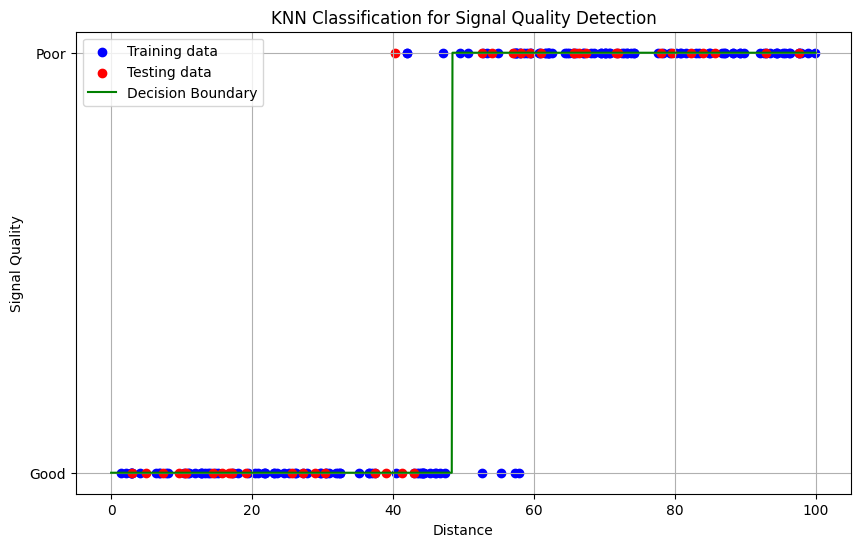

Classification Report:
              precision    recall  f1-score   support

        Good       0.95      1.00      0.98        20
        Poor       1.00      0.95      0.97        20

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Generate some synthetic data for demonstration
np.random.seed(0)
num_samples = 200
distance = np.random.uniform(1, 100, num_samples)  # Generating random distances
noise = np.random.normal(0, 5, num_samples)  # Adding some random noise
signal_quality = np.where(distance <= 50 + noise, 'Good', 'Poor')  # Generating signal quality based on distance with noise

# Reshape the data
distance = distance.reshape(-1, 1)  # Reshaping to a column vector

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(distance, signal_quality, test_size=0.2, random_state=42)

# Create and train the KNN classifier
k = 5  # Number of neighbors
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Generate some data for plotting decision boundaries
X_range = np.linspace(0, 100, 1000).reshape(-1, 1)
y_range = model.predict(X_range)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='red', label='Testing data')
plt.plot(X_range, y_range, color='green', label='Decision Boundary')
plt.xlabel('Distance')
plt.ylabel('Signal Quality')
plt.title('KNN Classification for Signal Quality Detection')
plt.legend()
plt.grid(True)
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_test))
